# Visualizing Data with DataFrames

Being able to visualize data is important for recognizing patterns and making data-driven decisions. The [Seaborn](https://seaborn.pydata.org/introduction.html) package is built on top of Matplotlib and used for visualizing data, especially tabular data like the kind in `DataFrame` objects. 


## Setup

In the cell below, we import the relevant libraries and create an initial `DataFrame`. 

To render the graphs in this notebook, we'll [set the Matplotlib backend to be `inline`](https://stackoverflow.com/a/43028034/1577649) so that figures appear directly below the cells.

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Read data from a local CSV file into a DataFrame object
df = pd.read_csv('data/weather/nyc.csv')
df.head(3)

,Unnamed: 0,Date,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,...,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees.br...,city,season
0,1,1948-07-01,84,78.0,72,71,65,58,93,65,...,2.0,16,8,NaN,0.00,0.0,Fog,264<br />,New York City (USA),Summer
1,2,1948-07-02,82,72.0,63,62,53,49,76,51,...,10.0,16,10,NaN,0.00,0.0,NaN,315<br />,New York City (USA),Summer
2,3,1948-07-03,78,71.0,64,66,58,53,84,62,...,5.0,14,6,NaN,0.00,0.0,NaN,203<br />,New York City (USA),Summer


Let's clean up the `Date` field in the `DataFrame` object so that we can use it more effectively in our visualizations. It is currently a string (`object` data type) and we want to convert it to an actual date object.

Note how after conversion, the `Date` column's type is now `datetime64[ns]`.

In [65]:
print('Type before conversion:', df.dtypes['Date'])

df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
print('Type after conversion:', df.dtypes['Date'])

Type before conversion: object
Type after conversion: datetime64[ns]


## Line Graph

Let's start with a simple line graph that maps the mean temperature over time. To keep the graph readable, we'll only use the last 2000 data points, by creating a new truncated `DataFrame` with the `tail()` method.

The [`seaborn.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) function returns a [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) object. The `fig` property on this object is in turn a [`matplotlib.figure.Figure`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html) object. 

Using the [`autofmt_xdate()`](https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.autofmt_xdate) method, we can format the x-axis to be more readable. This is especially helpful, when there are many labels crowding around each other.

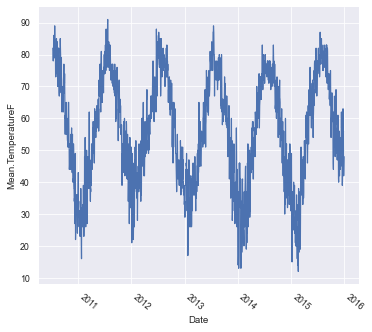

In [66]:
# Create a line plot
g = sns.relplot(x="Date", y="Mean.TemperatureF", kind="line", data=df.tail(2000))

# Format the date labels on the x-axis
g.fig.autofmt_xdate(rotation=320, ha='left')

As expected from weather data, the average temperature fluctuates each day, but is periodic over the years, following the seasons.

## Scatter Plot

A scatter plot can be used to determine if two values are correlated.

In this example, we check to see if the visibility is correlated to the Precipitation.

Before we can do that, however, we need to clean up some of our data. The column `PrecipitationIn` appears to be the `object` data type, meaning we are dealing with strings instead of numbers. Let's cast it first.

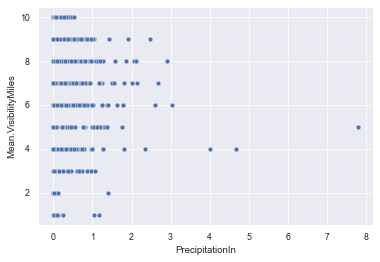

In [67]:
# Cast PrecipitationIn from string to a numerical value
df['PrecipitationIn'] = pd.to_numeric(df['PrecipitationIn'], errors='coerce')

g = sns.scatterplot(x="PrecipitationIn", y="Mean.VisibilityMiles", data=df.tail(2000))

There doesn't seem to be much of a correlation between the two. What about between visibility and humidity?

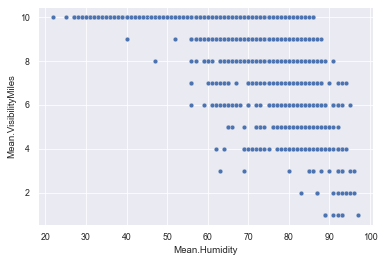

In [68]:
g = sns.scatterplot(x="Mean.Humidity", y="Mean.VisibilityMiles", data=df.tail(2000))

Here there seems to be some relationship. When the humidity is higher, visibility tends to be lower. That makes sense since more water in the air can be signs of fog, snow, haze or other conditions that make it difficult to see. In contrast, we see that on drier days, visbility is usually much higher.

You are not limited to just two variables in visualizations. The `hue` parameter can be used, for example, to group related data points by another column give them a similar color. Other grouping parameters can be used like `style` and `size`, which may be more accessible to viewers with visual impairments.

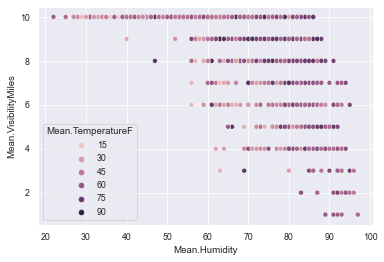

In [69]:
g = sns.scatterplot(x="Mean.Humidity", 
                    y="Mean.VisibilityMiles", 
                    hue='Mean.TemperatureF', 
                    data=df.tail(2000))